In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [2]:
train = pd.read_csv(r"C:\Users\goura\OneDrive\Documents\Credit_Scoring_Datasets\train.csv", low_memory=False)
test = pd.read_csv(r"C:\Users\goura\OneDrive\Documents\Credit_Scoring_Datasets\Credit_Testing.csv")

In [3]:
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [5]:
train.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [6]:
test.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [7]:
train.duplicated().any()

False

In [8]:

test.duplicated().any()

False

In [9]:
train.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [10]:
test.isna().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                        5015
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       7498
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                5704
Delay_from_due_date            0
Num_of_Delayed_Payment      3498
Changed_Credit_Limit           0
Num_Credit_Inquiries        1035
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4470
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     2271
Payment_Behaviour              0
Monthly_Balance              562
dtype: int64

In [11]:
train.shape

(100000, 28)

In [12]:
train['Credit_Score'].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

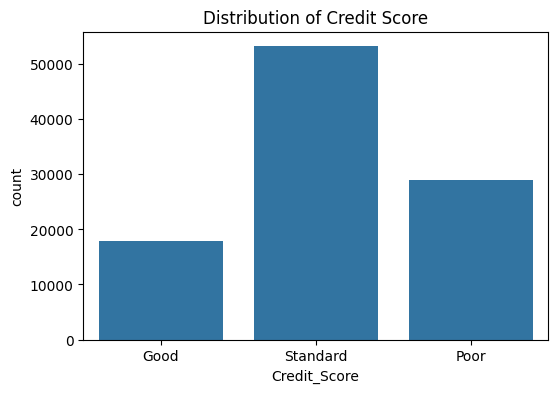

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(data=train, x='Credit_Score')
plt.title('Distribution of Credit Score')
plt.show()

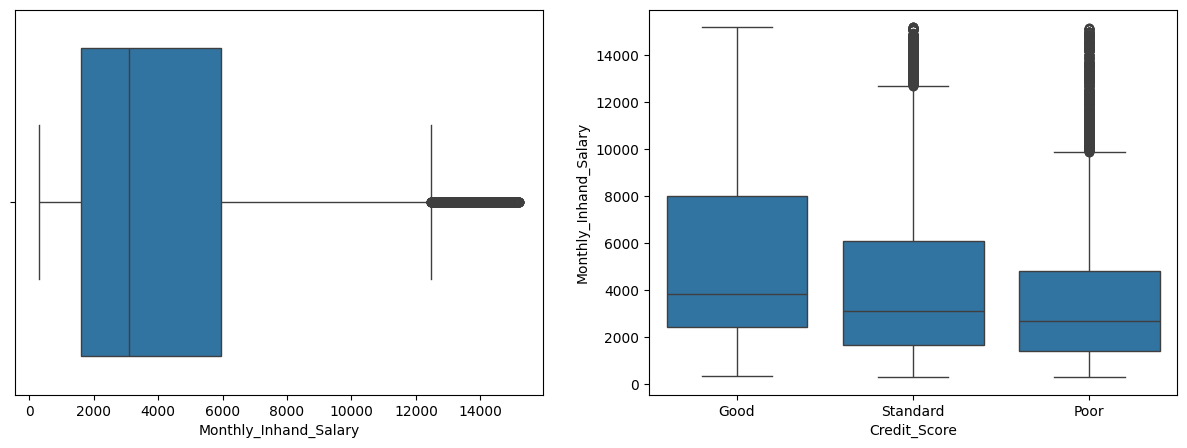

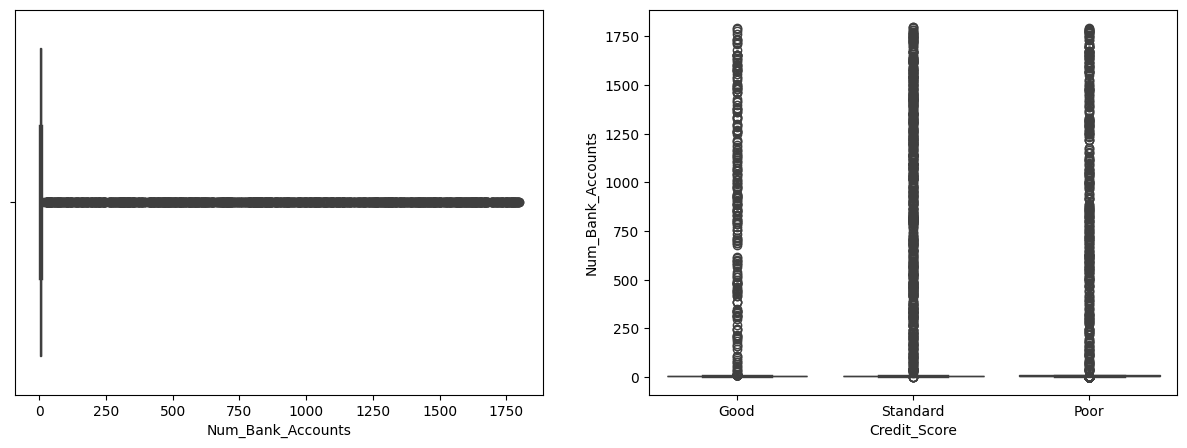

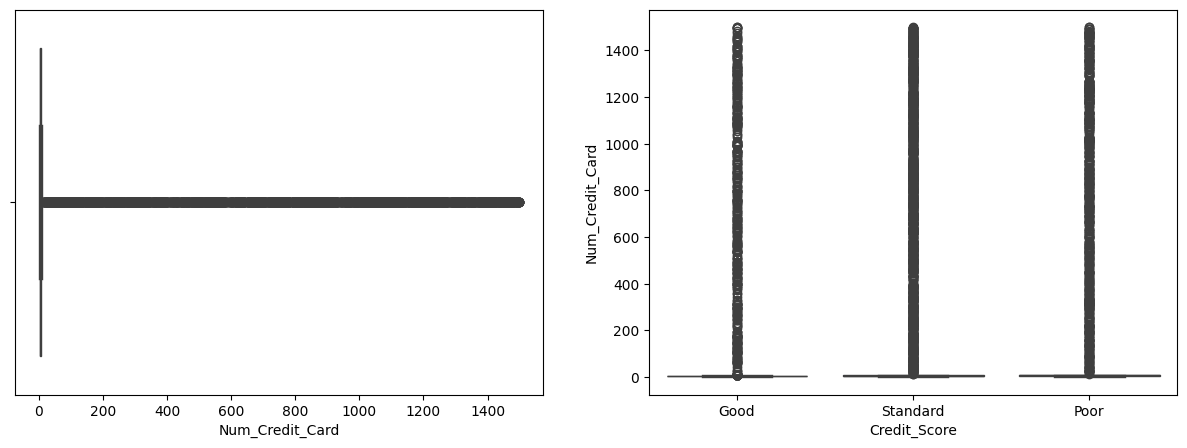

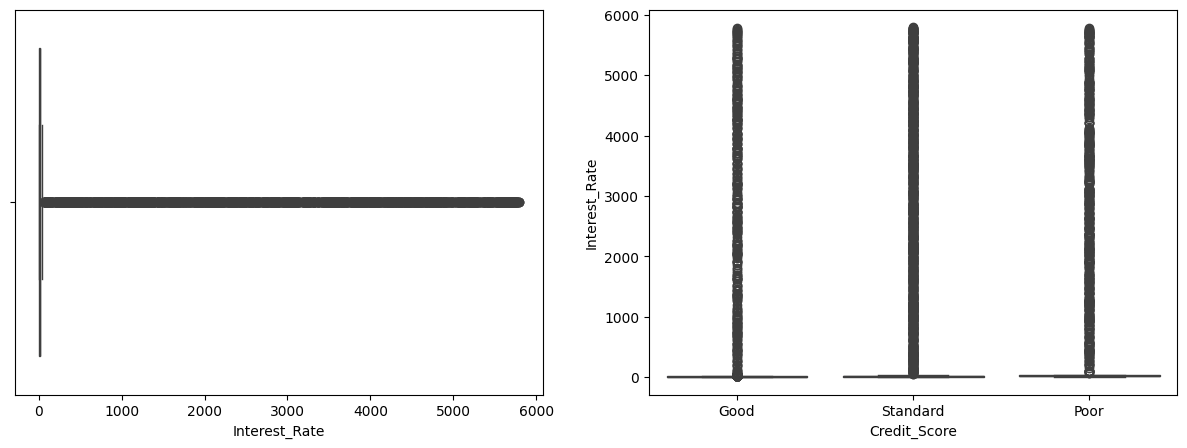

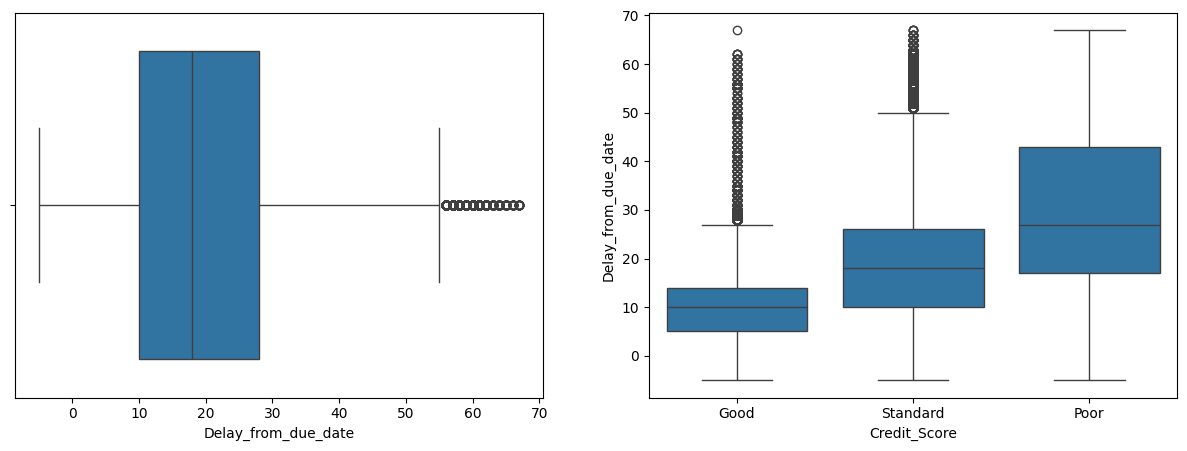

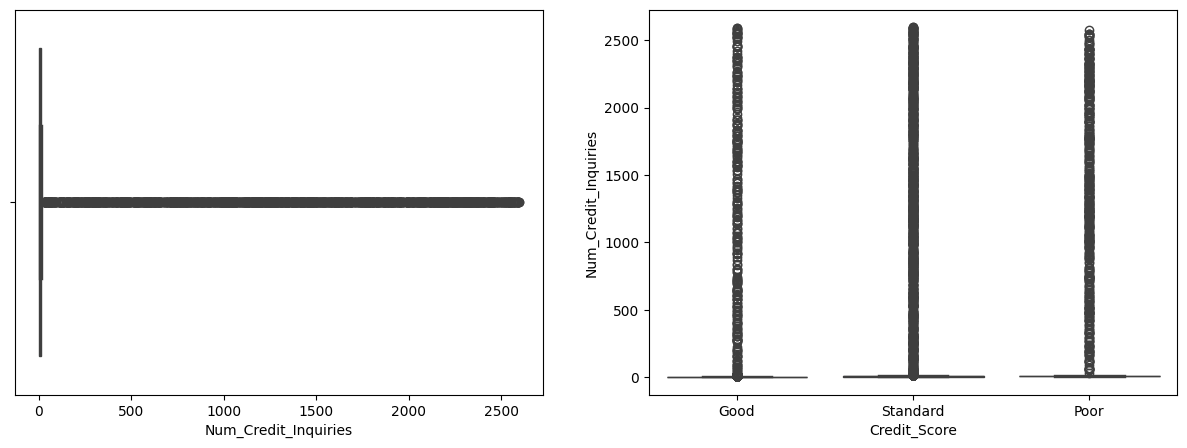

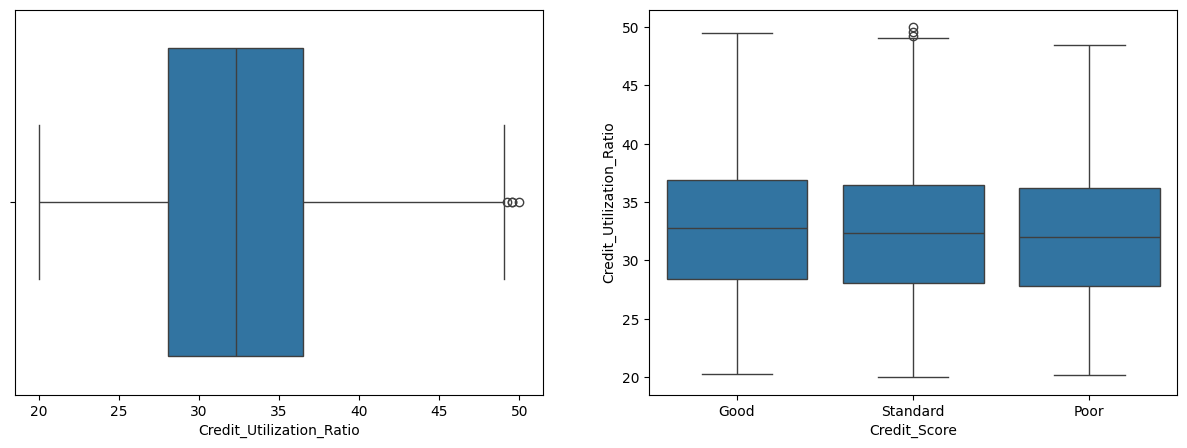

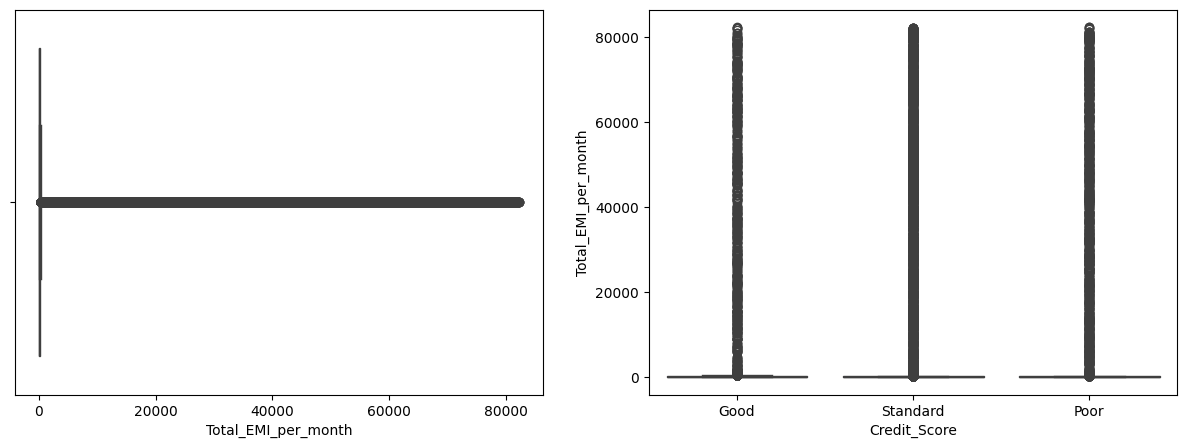

In [14]:
for col in train.select_dtypes(include = np.number):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.boxplot(x=col, data =train)
    plt.subplot(1,2,2)
    sns.boxplot(x='Credit_Score',y=col, data =train)
    plt.show()

# Data Preprocessing

In [15]:
columns=[
      'Credit_Score']
for item in columns:
    train[item] = LabelEncoder().fit_transform(train[item])
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,0
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,0
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,0
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,0
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,0


In [16]:
train['Credit_Score'].value_counts()

Credit_Score
2    53174
1    28998
0    17828
Name: count, dtype: int64

In [17]:
columns = ['Payment_of_Min_Amount','Payment_Behaviour','Name','Occupation','Credit_Mix']
for item in columns:
    train[item] = LabelEncoder().fit_transform(train[item])
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,84,23,821-00-0265,12,19114.12,1824.843333,3,...,3,809.98,26.822620,22 Years and 1 Months,1,49.574949,80.41529543900253,3,312.49408867943663,0
1,0x1603,CUS_0xd40,February,84,23,821-00-0265,12,19114.12,NaN,3,...,1,809.98,31.944960,NaN,1,49.574949,118.28022162236736,4,284.62916249607184,0
2,0x1604,CUS_0xd40,March,84,-500,821-00-0265,12,19114.12,NaN,3,...,1,809.98,28.609352,22 Years and 3 Months,1,49.574949,81.699521264648,5,331.2098628537912,0
3,0x1605,CUS_0xd40,April,84,23,821-00-0265,12,19114.12,NaN,3,...,1,809.98,31.377862,22 Years and 4 Months,1,49.574949,199.4580743910713,6,223.45130972736786,0
4,0x1606,CUS_0xd40,May,84,23,821-00-0265,12,19114.12,1824.843333,3,...,1,809.98,24.797347,22 Years and 5 Months,1,49.574949,41.420153086217326,2,341.48923103222177,0


In [18]:
train[['Payment_of_Min_Amount','Payment_Behaviour','Name','Occupation','Credit_Mix']]

,Payment_of_Min_Amount,Payment_Behaviour,Name,Occupation,Credit_Mix
0,1,3,84,12,3
1,1,4,84,12,1
2,1,5,84,12,1
3,1,6,84,12,1
4,1,2,84,12,1
...,...,...,...,...,...
99995,1,1,6528,9,3
99996,1,2,6528,9,3
99997,1,1,6528,9,1
99998,1,4,6528,9,1


In [19]:
columns2 =['Annual_Income','Age','Num_Credit_Card','Interest_Rate','Delay_from_due_date','Num_of_Delayed_Payment','Monthly_Balance',
                           'Num_Credit_Inquiries','Changed_Credit_Limit','Credit_History_Age',
                           'Outstanding_Debt','Total_EMI_per_month']
for item in columns2:
    mean_encoding = train.groupby([item])['Credit_Score'].mean()
    train[item] = train[item].map(mean_encoding)
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,84,1.383130,821-00-0265,12,0.25,1824.843333,3,...,3,0.25,26.822620,1.284314,1,0.25,80.41529543900253,3,0.0,0
1,0x1603,CUS_0xd40,February,84,1.383130,821-00-0265,12,0.25,NaN,3,...,1,0.25,31.944960,NaN,1,0.25,118.28022162236736,4,0.0,0
2,0x1604,CUS_0xd40,March,84,1.319413,821-00-0265,12,0.25,NaN,3,...,1,0.25,28.609352,1.219008,1,0.25,81.699521264648,5,0.0,0
3,0x1605,CUS_0xd40,April,84,1.383130,821-00-0265,12,0.25,NaN,3,...,1,0.25,31.377862,1.243902,1,0.25,199.4580743910713,6,0.0,0
4,0x1606,CUS_0xd40,May,84,1.383130,821-00-0265,12,0.25,1824.843333,3,...,1,0.25,24.797347,1.212245,1,0.25,41.420153086217326,2,0.0,0


In [20]:
train.drop('Type_of_Loan',axis=1,inplace=True)

In [21]:
train.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                          int32
Age                         float64
SSN                          object
Occupation                    int32
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                  object
Delay_from_due_date         float64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                    int32
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount         int32
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour             int32
Monthly_Balance             float64
Credit_Score                  int32
dtype: object

In [22]:
columns_to_drop = ['ID', 'Customer_ID', 'Month', 'SSN', 'Amount_invested_monthly']
train.drop(columns=columns_to_drop, inplace=True)

In [23]:
X=train.drop('Credit_Score',axis=1)
y = train.Credit_Score

In [24]:
columns3 =['Name','Annual_Income','Num_of_Loan',
                           'Outstanding_Debt']
for item in columns3:
    train.drop(item,axis=1,inplace=True)
X=train.drop('Credit_Score',axis=1)
y = train.Credit_Score

In [25]:
X.columns

Index(['Age', 'Occupation', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,shuffle=True,random_state=42)

In [27]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Logistic Regression Model

In [28]:
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.preprocessing import StandardScaler

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

logistic_model = LogisticRegression(max_iter = 2000)
logistic_model.fit(X_train_imputed, y_train)

train_predictions = logistic_model.predict(X_train_imputed)
test_predictions = logistic_model.predict(X_test_imputed)

train_accuracy = accuracy_score(train_predictions, y_train)
test_accuracy = accuracy_score(test_predictions, y_test)

print("Logistic Regression Training Accuracy:", train_accuracy)
print("Logistic Regression Testing Accuracy:", test_accuracy)

Logistic Regression Training Accuracy: 0.9820746268656716
Logistic Regression Testing Accuracy: 0.9828484848484849


C:\Users\goura\anaconda3\envs\TF2\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train_imputed, y_train)

knn_train_predictions = knn_model.predict(X_train_imputed)
knn_test_predictions = knn_model.predict(X_test_imputed)

knn_train_accuracy = accuracy_score(knn_train_predictions, y_train)
knn_test_accuracy = accuracy_score(knn_test_predictions, y_test)

print("KNeighborsClassifier Trainaing Accuracy:", knn_train_accuracy)
print("KNeighborsClassifier Test Accuracy:", knn_test_accuracy)

KNeighborsClassifier Trainaing Accuracy: 0.8032537313432836
KNeighborsClassifier Test Accuracy: 0.6743636363636364


# SVC

In [30]:
from sklearn.svm import LinearSVC

svc_model = LinearSVC()
svc_model.fit(X_train_imputed, y_train)

svc_train_predictions = svc_model.predict(X_train_imputed)
svc_test_predictions = svc_model.predict(X_test_imputed)

svc_train_accuracy = accuracy_score(svc_train_predictions, y_train)
svc_test_accuracy = accuracy_score(svc_test_predictions, y_test)

print("LinearSVC Training Accuracy:", svc_train_accuracy)
print("LinearSVC Test Accuracy:", svc_test_accuracy)

LinearSVC Training Accuracy: 0.982776119402985
LinearSVC Test Accuracy: 0.9819393939393939


In [31]:
from sklearn.metrics import classification_report, confusion_matrix
# Classification report for the test set
print("Classification Report for SVC Model:\n")
print(classification_report(y_test, svc_test_predictions))
print("Confusion Matrix for SVC Model:\n")
print(confusion_matrix(y_test, svc_test_predictions))

Classification Report for SVC Model:

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      5866
           1       0.99      0.96      0.97      9633
           2       0.99      1.00      0.99     17501

    accuracy                           0.98     33000
   macro avg       0.97      0.98      0.98     33000
weighted avg       0.98      0.98      0.98     33000

Confusion Matrix for SVC Model:

[[ 5749    44    73]
 [  340  9209    84]
 [    0    55 17446]]


In [32]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

svc_model = LinearSVC()
grid_search = GridSearchCV(svc_model, param_grid, cv=5)
grid_search.fit(X_train_imputed, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

best_svc_model = grid_search.best_estimator_

svc_train_predictions = best_svc_model.predict(X_train_imputed)
svc_test_predictions = best_svc_model.predict(X_test_imputed)

svc_train_accuracy = accuracy_score(svc_train_predictions, y_train)
svc_test_accuracy = accuracy_score(svc_test_predictions, y_test)

print("Optimized LinearSVC Training Accuracy:", svc_train_accuracy)
print("Optimized LinearSVC Test Accuracy:", svc_test_accuracy)

Best parameters found:  {'C': 100}
Optimized LinearSVC Training Accuracy: 0.982776119402985
Optimized LinearSVC Test Accuracy: 0.9819393939393939


In [33]:
print(train.columns)

Index(['Age', 'Occupation', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Payment_Behaviour', 'Monthly_Balance', 'Credit_Score'],
      dtype='object')


In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [36]:
import joblib
joblib.dump(best_svc_model, 'credit_score_model.pkl')

['credit_score_model.pkl']

In [37]:
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(best_svc_model, X_train_scaled, y_train, cv=5)
print(f"Cross-validation scores: {cross_val_scores}")
print(f"Mean cross-validation score: {np.mean(cross_val_scores)}")

Cross-validation scores: [0.98962687 0.98604478 0.98753731 0.98843284 0.98828358]
Mean cross-validation score: 0.9879850746268657


# Model Prediction

In [55]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

le_credit_score = LabelEncoder()
le_credit_score.fit(train['Credit_Score'])

creditworthiness_predictions = le_credit_score.inverse_transform(svc_test_predictions)
actual_creditworthiness = le_credit_score.inverse_transform(y_test)

results_df = pd.DataFrame({
    'Predicted_Creditworthiness': creditworthiness_predictions,
    'Actual_Creditworthiness': actual_creditworthiness
})

results_df.to_csv('creditworthiness_predictions.csv', index=False)

print("Predictions and actual values saved to 'creditworthiness_predictions.csv'.")

Predictions and actual values saved to 'creditworthiness_predictions.csv'.


In [59]:
import joblib
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler

svc_model = LinearSVC()
svc_model.fit(X_train_imputed, y_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)

joblib.dump(svc_model, 'best_svc_model.joblib')
joblib.dump(scaler, 'scaler.joblib')

print("Model and scaler saved successfully.")

Model and scaler saved successfully.


# Model Created